# Dragon Real Estates - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
500    0
501    0
502    0
503    0
504    0
Name: CHAS, Length: 505, dtype: int64

In [6]:
housing['CHAS'].value_counts()

CHAS
0    470
1     35
Name: count, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,500.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620625,11.386139,11.144832,0.069307,0.554865,6.283750,68.554455,3.792722,9.564356,408.566337,18.456832,356.594376,12.660020,22.534653
std,8.608589,23.340080,6.864761,0.254227,0.115930,0.704675,28.173012,2.107150,8.709391,168.541326,2.166895,91.367787,7.146426,9.206130
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.884750,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,6.930000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208500,77.300000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.620500,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

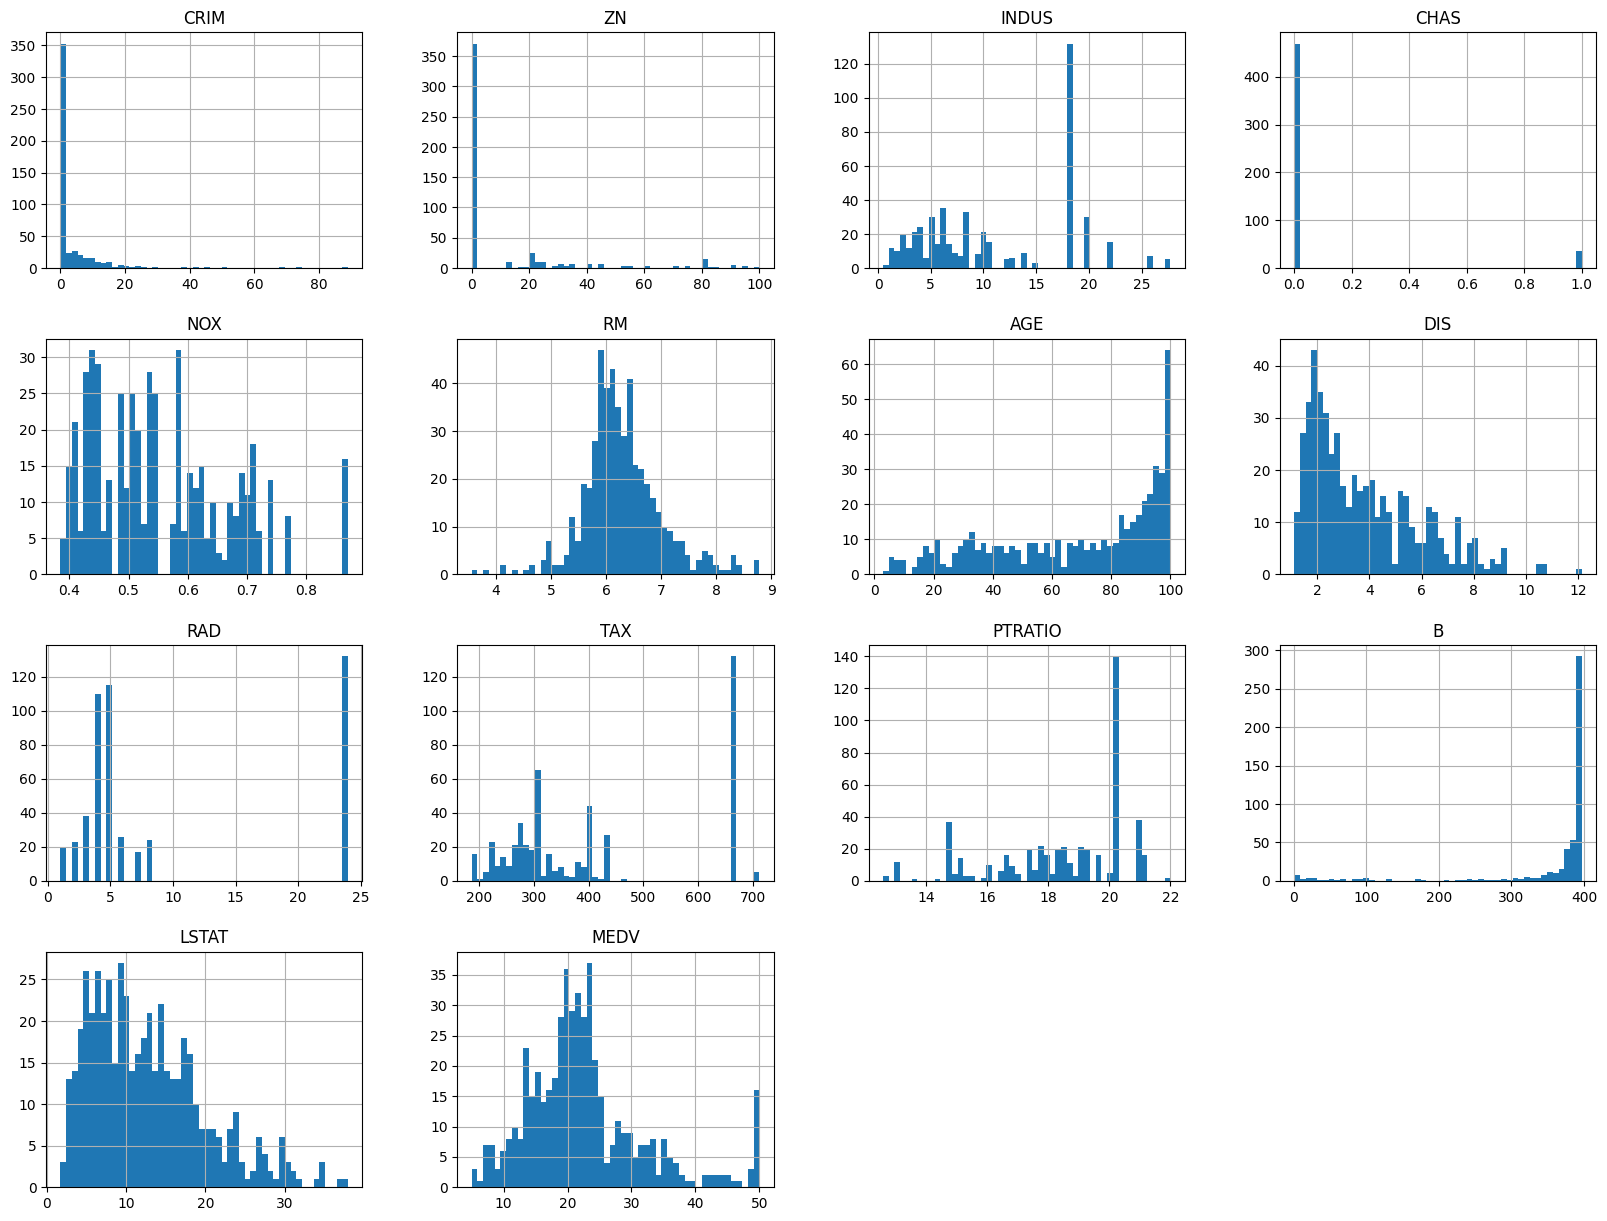

In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

## Train-Test Splitting

In [10]:
#For learning purposer
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(45)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(housing, 0.2)

In [12]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=45)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 101


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=45)
# print(split)
for train_index, test_index in split.split(housing, housing['CHAS']):
    # print(train_index)
    # print(test_index)
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

In [15]:
strat_train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
197,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2,329,12.6,392.20,6.62,34.6
226,0.41238,0.0,6.20,0,0.504,7.163,79.9,3.2157,8,307,17.4,372.08,6.36,31.6
303,0.05515,33.0,2.18,0,0.472,7.236,41.1,4.0220,7,222,18.4,393.68,6.93,36.1
29,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.2330,4,307,21.0,360.17,22.60,12.7
246,0.19657,22.0,5.86,0,0.431,6.226,79.2,8.0555,7,330,19.1,376.14,10.15,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.28955,0.0,10.59,0,0.489,5.412,9.8,3.5875,4,277,18.6,348.93,29.55,23.7
37,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279,19.2,393.43,10.13,24.7
396,7.67202,0.0,18.10,0,0.693,5.747,98.9,1.6334,24,666,20.2,393.10,19.92,8.5
207,0.13587,0.0,10.59,1,0.489,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4


In [16]:
strat_train_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.738346,10.487624,11.375990,0.069307,0.558801,6.259832,69.262129,3.735767,9.772277,414.398515,18.491584,360.160297,12.909827,22.490842
std,8.890220,22.282249,6.938669,0.254290,0.118031,0.716462,28.087466,2.138974,8.817286,170.440364,2.154245,84.262619,7.367505,9.264829
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000,5.000000
25%,0.086962,0.000000,5.190000,0.000000,0.449000,5.874750,46.600000,2.019025,4.000000,284.000000,17.400000,375.472500,7.135000,16.950000
50%,0.274475,0.000000,9.900000,0.000000,0.538000,6.194000,79.200000,3.010650,5.000000,336.000000,19.100000,391.305000,11.730000,21.050000
75%,3.840055,3.125000,18.100000,0.000000,0.631000,6.593500,94.150000,5.141475,24.000000,666.000000,20.200000,396.215000,17.092500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [18]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 235 to 131
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     101 non-null    float64
 1   ZN       101 non-null    float64
 2   INDUS    101 non-null    float64
 3   CHAS     101 non-null    int64  
 4   NOX      101 non-null    float64
 5   RM       100 non-null    float64
 6   AGE      101 non-null    float64
 7   DIS      101 non-null    float64
 8   RAD      101 non-null    int64  
 9   TAX      101 non-null    int64  
 10  PTRATIO  101 non-null    float64
 11  B        101 non-null    float64
 12  LSTAT    101 non-null    float64
 13  MEDV     101 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 11.8 KB


In [19]:
strat_test_set['CHAS'].value_counts()

CHAS
0    94
1     7
Name: count, dtype: int64

In [20]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,101.000000,101.000000,101.000000,101.000000,101.000000,100.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,3.149740,14.980198,10.220198,0.069307,0.539119,6.379420,65.723762,4.020540,8.732673,385.237624,18.317822,342.330693,11.660792,22.709901
std,7.396505,26.988694,6.511951,0.255242,0.106206,0.650011,28.476928,1.968348,8.253352,159.401640,2.222224,114.907202,6.114767,9.010666
min,0.013110,0.000000,0.740000,0.000000,0.392000,5.155000,6.500000,1.413000,1.000000,188.000000,12.600000,0.320000,2.470000,5.600000
25%,0.064660,0.000000,5.130000,0.000000,0.449000,5.965250,37.300000,2.323600,4.000000,276.000000,17.300000,369.300000,6.720000,17.100000
50%,0.221880,0.000000,8.140000,0.000000,0.520000,6.211500,73.300000,3.747600,5.000000,311.000000,18.600000,392.110000,10.560000,21.700000
75%,2.010190,20.000000,18.100000,0.000000,0.605000,6.717750,93.400000,5.400700,8.000000,432.000000,20.200000,396.140000,16.510000,26.400000
max,51.135800,95.000000,25.650000,1.000000,0.871000,8.337000,100.000000,9.220300,24.000000,666.000000,21.200000,396.900000,29.050000,50.000000


In [21]:
# print(94/7)
# print(376/28)

In [22]:
housing = strat_train_set.copy()

## Looking for Correlations

In [23]:
corr_matrix = housing.corr()
# print(corr_matrix)

In [24]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.686815
ZN         0.337373
B          0.295836
DIS        0.222667
CHAS       0.175740
RAD       -0.353186
AGE       -0.357543
CRIM      -0.378255
NOX       -0.398444
TAX       -0.452739
PTRATIO   -0.484616
INDUS     -0.487059
LSTAT     -0.733255
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

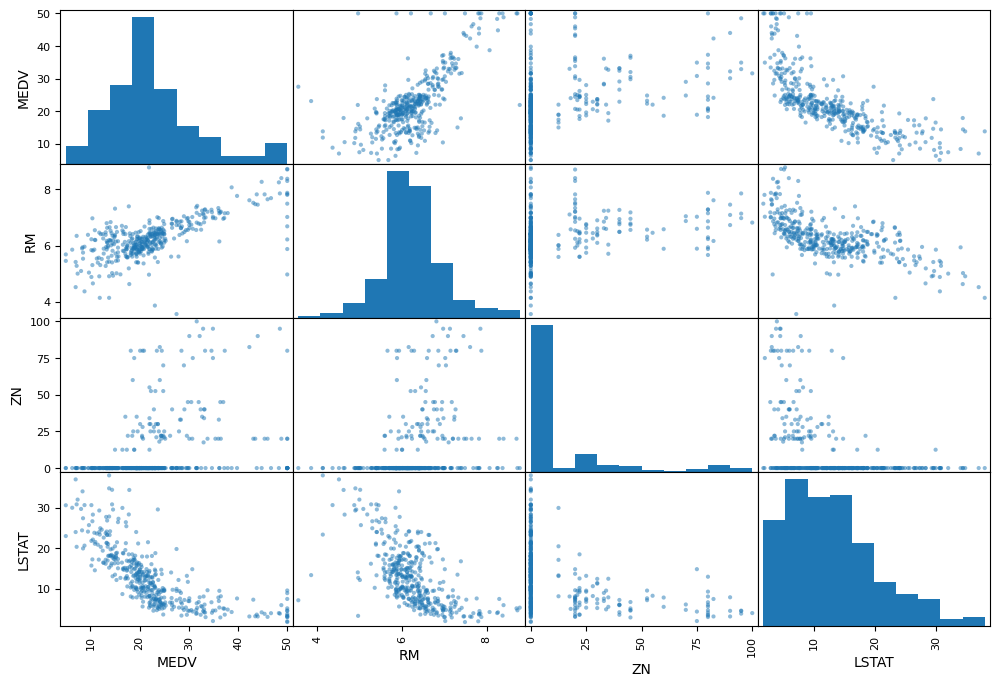

In [25]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='RM', ylabel='MEDV'>

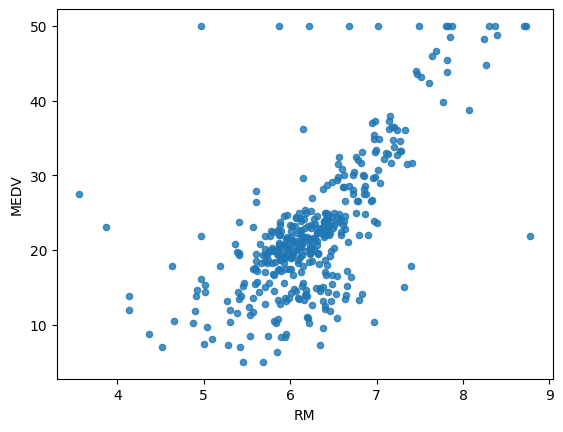

In [26]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

## Trying out Atribute Combinations

In [27]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [28]:
housing['TAXRM']

197     45.229585
226     42.859137
303     30.679934
29      53.737091
246     53.003534
          ...    
213     51.182557
37      46.765002
396    115.886550
207     45.679420
334     37.104522
Name: TAXRM, Length: 404, dtype: float64

In [29]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
197,0.03768,80.0,1.52,0,0.404,7.274,38.3,7.3090,2,329,12.6,392.20,6.62,34.6,45.229585
226,0.41238,0.0,6.20,0,0.504,7.163,79.9,3.2157,8,307,17.4,372.08,6.36,31.6,42.859137
303,0.05515,33.0,2.18,0,0.472,7.236,41.1,4.0220,7,222,18.4,393.68,6.93,36.1,30.679934
29,1.13081,0.0,8.14,0,0.538,5.713,94.1,4.2330,4,307,21.0,360.17,22.60,12.7,53.737091
246,0.19657,22.0,5.86,0,0.431,6.226,79.2,8.0555,7,330,19.1,376.14,10.15,20.5,53.003534


In [30]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.686815
ZN         0.337373
B          0.295836
DIS        0.222667
CHAS       0.175740
RAD       -0.353186
AGE       -0.357543
CRIM      -0.378255
NOX       -0.398444
TAX       -0.452739
PTRATIO   -0.484616
INDUS     -0.487059
TAXRM     -0.521756
LSTAT     -0.733255
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

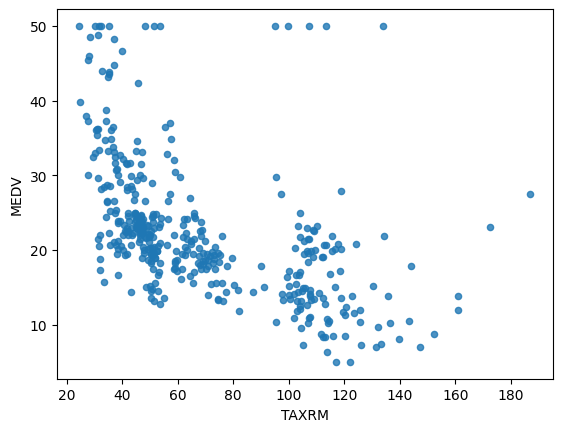

In [31]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

## Missing Attributes

In [32]:
# To take care of missing attributes you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attributes
#     3. Set the value to some value(0 mean or median)

In [33]:
a = housing.dropna(subset=["RM"]) # Option 1
a.shape
# Note that the original housing dataframe will remain unchanged

(400, 15)

In [34]:
housing.drop("RM", axis=1) #Option 2
# Note that there is no RM column and aslo note that the original housing dataframe will remain unchanged

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
197,0.03768,80.0,1.52,0,0.404,38.3,7.3090,2,329,12.6,392.20,6.62,34.6,45.229585
226,0.41238,0.0,6.20,0,0.504,79.9,3.2157,8,307,17.4,372.08,6.36,31.6,42.859137
303,0.05515,33.0,2.18,0,0.472,41.1,4.0220,7,222,18.4,393.68,6.93,36.1,30.679934
29,1.13081,0.0,8.14,0,0.538,94.1,4.2330,4,307,21.0,360.17,22.60,12.7,53.737091
246,0.19657,22.0,5.86,0,0.431,79.2,8.0555,7,330,19.1,376.14,10.15,20.5,53.003534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.28955,0.0,10.59,0,0.489,9.8,3.5875,4,277,18.6,348.93,29.55,23.7,51.182557
37,0.17505,0.0,5.96,0,0.499,30.2,3.8473,5,279,19.2,393.43,10.13,24.7,46.765002
396,7.67202,0.0,18.10,0,0.693,98.9,1.6334,24,666,20.2,393.10,19.92,8.5,115.886550
207,0.13587,0.0,10.59,1,0.489,59.1,4.2392,4,277,18.6,381.32,14.66,24.4,45.679420


In [35]:
median = housing["RM"].median() # Compute median for Option 3

In [36]:
median

6.194

In [37]:
housing["RM"].fillna(median) #Option 3
# Note that the original housing dataframe will remain unchanged

197    7.274
226    7.163
303    7.236
29     5.713
246    6.226
       ...  
213    5.412
37     5.966
396    5.747
207    6.064
334    6.037
Name: RM, Length: 404, dtype: float64

In [38]:
housing.shape

(404, 15)

In [39]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000
mean,3.738346,10.487624,11.375990,0.069307,0.558801,6.259832,69.262129,3.735767,9.772277,414.398515,18.491584,360.160297,12.909827,22.490842,68.337210
std,8.890220,22.282249,6.938669,0.254290,0.118031,0.716462,28.087466,2.138974,8.817286,170.440364,2.154245,84.262619,7.367505,9.264829,32.425612
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.449000,5.874750,46.600000,2.019025,4.000000,284.000000,17.400000,375.472500,7.135000,16.950000,44.122252
50%,0.274475,0.000000,9.900000,0.000000,0.538000,6.194000,79.200000,3.010650,5.000000,336.000000,19.100000,391.305000,11.730000,21.050000,54.572101
75%,3.840055,3.125000,18.100000,0.000000,0.631000,6.593500,94.150000,5.141475,24.000000,666.000000,20.200000,396.215000,17.092500,25.000000,100.789998
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [41]:
imputer.statistics_

array([2.74475000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.19400000e+00, 7.92000000e+01, 3.01065000e+00,
       5.00000000e+00, 3.36000000e+02, 1.91000000e+01, 3.91305000e+02,
       1.17300000e+01, 2.10500000e+01, 5.45721008e+01])

In [42]:
X = imputer.transform(housing)

In [43]:
X

array([[3.76800000e-02, 8.00000000e+01, 1.52000000e+00, ...,
        6.62000000e+00, 3.46000000e+01, 4.52295848e+01],
       [4.12380000e-01, 0.00000000e+00, 6.20000000e+00, ...,
        6.36000000e+00, 3.16000000e+01, 4.28591372e+01],
       [5.51500000e-02, 3.30000000e+01, 2.18000000e+00, ...,
        6.93000000e+00, 3.61000000e+01, 3.06799337e+01],
       ...,
       [7.67202000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        1.99200000e+01, 8.50000000e+00, 1.15886550e+02],
       [1.35870000e-01, 0.00000000e+00, 1.05900000e+01, ...,
        1.46600000e+01, 2.44000000e+01, 4.56794195e+01],
       [3.96100000e-02, 0.00000000e+00, 5.19000000e+00, ...,
        8.01000000e+00, 2.11000000e+01, 3.71045221e+01]])

In [44]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [45]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.738346,10.487624,11.375990,0.069307,0.558801,6.259181,69.262129,3.735767,9.772277,414.398515,18.491584,360.160297,12.909827,22.490842,68.200921
std,8.890220,22.282249,6.938669,0.254290,0.118031,0.712928,28.087466,2.138974,8.817286,170.440364,2.154245,84.262619,7.367505,9.264829,32.293133
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.520000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.449000,5.875000,46.600000,2.019025,4.000000,284.000000,17.400000,375.472500,7.135000,16.950000,44.512266
50%,0.274475,0.000000,9.900000,0.000000,0.538000,6.194000,79.200000,3.010650,5.000000,336.000000,19.100000,391.305000,11.730000,21.050000,54.572101
75%,3.840055,3.125000,18.100000,0.000000,0.631000,6.590750,94.150000,5.141475,24.000000,666.000000,20.200000,396.215000,17.092500,25.000000,100.240989
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


## Scikit-learn Design

Primarily, three types of objects:-
1. Estimators - It estimates some parameter based on a dataset. Eg: Imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters.

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit _transform() which fits and then transforms.
 
3. Predictors - LinearRegression model is a example of predictor. fit() and predict are two common functions. It also gives score function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling method:
1. Min-max scaling (Normalization)
     (value - min)/(max - min)
     Sklearn provides a class called MinMaxScaler for this.
3. Standarization
     (value - mean)/std
     Sklearn provides a class called Standard Scaler for this.

## Creating a Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
    # ..... add as many as you want in your pipeline
])


In [49]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [50]:
housing_num_tr

array([[-0.41677875,  3.12349833, -1.42220525, ..., -0.85478399,
         1.30862345, -0.71222012],
       [-0.37457905, -0.47125529, -0.74688796, ..., -0.89011785,
         0.98441674, -0.78571522],
       [-0.41481123,  1.01158057, -1.3269682 , ..., -0.81265516,
         1.4707268 , -1.16332815],
       ...,
       [ 0.44302066, -0.47125529,  0.97026499, ...,  0.95267869,
        -1.51197488,  1.47848011],
       [-0.40572034, -0.47125529, -0.11341725, ...,  0.23784758,
         0.20632065, -0.69827312],
       [-0.41656139, -0.47125529, -0.89262951, ..., -0.66588376,
        -0.15030672, -0.96413551]])

## Selecting a desire model for Dragon Real Estates